# XU HƯỚNG CÁC THỂ LOẠI PHIM ANIME TRÊN TOÀN CẦU NHƯ THẾ NÀO?

**Lợi ích:**
- Phân tích các thể loại phim là một yếu tố quan trọng để hiểu rõ được thị hiếu người xem.
- Thể loại phim không chỉ phản ánh phong cách kể chuyện và đặc điểm nội dung, mà còn đóng vai trò quan trọng trong việc thu hút khán giả.
- Giúp định hướng các nhà sản xuất phim để tối ưu hóa chiến lược sản xuất.
- Đáp ứng được nhu cầu và tâm lý của người xem, giúp người xem có trải nghiệm xem phim tốt hơn.

**Cách thực hiện:**
- Thống kê số lượng phim được sản xuất qua các năm.
- Tính tổng số lượng mà mỗi thể loại phim “góp mặt”.
- Thực hiện phân tích xu hướng của thể loại thông qua số lượng phim của mỗi thể loại, trung bình điểm đánh giá và trung bình độ phổ biến.

### 1. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Đọc dữ liệu

In [2]:
df = pd.read_csv('../data/anime_preprocessing.csv')
print(f'Dữ liệu có tổng cộng {df.shape[0]} dòng và {df.shape[1]} cột.')
df.head()

Dữ liệu có tổng cộng 16840 dòng và 14 cột.


,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Popularity,Year
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24.0,8.75,988000.0,43,1998
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,631,2001
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24.0,8.22,380049.0,258,1998
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25.0,7.24,44600.0,1908,2002
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23.0,6.93,6891.0,5485,2004


### 3. Tiền xử lý và phám khá dữ liệu

**Loại bỏ những cột thuộc tính không cần thiết trong quá trình phân tích.**

Vì ta chỉ cần tập trung vào thể loại phim và điểm đánh giá, nên để thuận tiện cho việc quan sát bộ dữ liệu khi phân tích, ta sẽ loại bỏ những cột không cần thiết như *Studios, Source, Duration*.

In [3]:
# Loại bỏ những cột thuộc tính không cần thiết trong quá trình phân tích
df = df.drop(columns=['Studios', 'Source', 'Duration (mins)'])
df.head()

,ID,Title,Episodes,Type,Aired,Producers,Genres,Score,Scored By,Popularity,Year
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,"Action, Award Winning, Sci-Fi",8.75,988000.0,43,1998
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual","Action, Sci-Fi",8.38,219779.0,631,2001
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,"Action, Adventure, Sci-Fi",8.22,380049.0,258,1998
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment","Action, Drama, Mystery, Supernatural",7.24,44600.0,1908,2002
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu","Action, Adventure, Fantasy",6.93,6891.0,5485,2004



**Khám phá số lượng thể loại khác nhau trong bộ dữ liệu.**


In [4]:
# Tách các thể loại thể loại qua dấu phẩy và bỏ khoảng trắng 
all_genres = df['Genres'].dropna().str.split(',').explode().str.strip()

# In ra số lượng các thể loại
print(f'Dữ liệu có tổng cộng {all_genres.nunique()} thể loại.\nTrong đó bao gồm:')

# In ra danh sách các thể loại
genre_columns = all_genres.unique()
genre_columns = genre_columns.tolist()
genre_columns

Dữ liệu có tổng cộng 22 thể loại.
Trong đó bao gồm:


['Action',
 'Award Winning',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Mystery',
 'Supernatural',
 'Fantasy',
 'UNKNOWN',
 'Comedy',
 'Romance',
 'Slice of Life',
 'Sports',
 'Suspense',
 'Ecchi',
 'Avant Garde',
 'Gourmet',
 'Horror',
 'Girls Love',
 'Boys Love',
 'Hentai',
 'Erotica']

**Kiểm tra xem có bao nhiêu phim đơn thể loại.**

In [5]:
# Đếm số dòng đơn thể loại và in ra thể loại, số lượng
single_genre_rows = df['Genres'].dropna()[~df['Genres'].str.contains(',')]
single_genre_rows.value_counts()

Genres
UNKNOWN    7919
Name: count, dtype: int64

Ta thấy, dữ liệu gồm 7919 phim có thể loại đơn là UNKNOWN, tuy nhiên đây là giá trị được điền vào những dòng thiếu giá trị. Nên tập dữ liệu chỉ gồm những phim đa thể loại, hoặc những phim không rõ thể loại.

**Kiểm tra giá trị thiếu của các cột cần thiết.**

In [6]:
# Kiểm tra giá trị thiếu của các cột cần thiết
for col in df.columns:
    missing = df[col].isna().mean() * 100
    if missing == 0:
        continue
    else:
        print(f'Phần trăm giá trị còn thiếu của cột {col} là {missing:.2f}%')

Ta thấy rằng, dữ liệu đã được xử lý nên không cột nào có giá trị thiếu.

**Chuẩn hóa dữ liệu:**

Ta thấy dữ liệu gồm 22 thể loại khác nhau, nhưng các bộ phim của tập dữ liệu đều đa thể loại, để thuận tiện cho quá trình phân tích, ta áp dụng phương pháp **One Hot Encoding** để thuận tiện cho quá trình phân tích.

In [7]:
genres_split = df['Genres'].str.get_dummies(sep=', ')
df_cleaned = pd.concat([df, genres_split], axis=1)
print(f'Dữ liệu sau khi tiền xử lý gồm {df_cleaned.shape[0]} hàng và {df_cleaned.shape[1]} cột.')
df_cleaned.head()

Dữ liệu sau khi tiền xử lý gồm 16840 hàng và 33 cột.


,ID,Title,Episodes,Type,Aired,Producers,Genres,Score,Scored By,Popularity,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,"Action, Award Winning, Sci-Fi",8.75,988000.0,43,...,0,0,0,0,1,0,0,0,0,0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual","Action, Sci-Fi",8.38,219779.0,631,...,0,0,0,0,1,0,0,0,0,0
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,"Action, Adventure, Sci-Fi",8.22,380049.0,258,...,0,0,0,0,1,0,0,0,0,0
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment","Action, Drama, Mystery, Supernatural",7.24,44600.0,1908,...,0,0,1,0,0,0,0,1,0,0
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu","Action, Adventure, Fantasy",6.93,6891.0,5485,...,0,0,0,0,0,0,0,0,0,0


**Khám phá dữ liệu:** ta sẽ phân tích sơ qua về đặc điểm của các thể loại để có thể hiểu rõ hơn về dữ liệu, giúp việc phân tích dễ dàng hơn.
- **Action**: là thể loại phim hành động với các tình huống phim gay cấn, quyết liệt.
- **Adventure:** là thể loại phiêu lưu, khám phá những cuộc hành trình kỳ thú.
- **Avant Garde:** thể loại phim phá cách, mới mẻ, mang tính sáng tạo và nghệ thuật, thể hiện qua những cách kể chuyện độc đáo, không theo chuẩn mực.
- **Award Winning:** gồm những phim đã nhận được các giải thưởng uy tín từ những liên hoan phim danh giá hoặc các tổ chức nghệ thuật lớn.
- **Boys Love:** những bộ phim tập trung vào mối quan hệ tình cảm hoặc lãng mạn giữa những nhân vật nam. 
- **Comedy:** thể loại phim hài hước mang đến tiếng cười và sự thư giãn với các tình huống vui nhộn.
- **Drama:** các bộ phim chính kịch, là các câu chuyện về những tình huống cảm xúc sâu sắc, xung đột tâm lý hoặc những mối quan hệ phức tạp trong cuộc sống.
- **Ecchi:** các bộ phim được kết hợp giữa yếu tố hài hước và các cảnh tình cảm táo bạo, nhưng vẫn giữ được yếu tố lãng mạn. 
- **Erotica:** các bộ phim này bao gồm những phân cảnh 18+ rõ rệt, chỉ dành cho người lớn, với những cảnh nóng bỏng, tập trung vào các tình tiết nhạy cảm.
- **Fantasy:** gồm những bộ phìm kỳ ảo, xảy ra trong thế giới tưởng tượng.
- **Girls Love:** những bộ phim tập trung vào các mối quan hệ tình cảm giữa những nhân vật nữ. .
- **Gourmet:** tập trung vào các câu chuyện xoay quanh ẩm thực và nghệ thuật nấu ăn.
- **Hentai:** gồm những phân cảnh 18+ hoàn toàn, nhạy cảm và không phù hợp với khán giả dưới 18 tuổi.
- **Horror:** thể loại phim kinh dị mang lại cảm giác sợ hãi và hồi hộp với nhiều phân cảnh ma quái hoặc rùng rợn. 
- **Mystery:** thể loại phim bí ẩn, các câu chuyện xoay quanh những vụ án ly kỳ hoặc những bí ẩn cần phải được giải quyết. 
- **Romance:** thể loại phim lãng mạn, tập trung vào các câu chuyện tình yêu.
- **Sci-Fi:** các bộ phim khoa học viễn tưởng, nội dung thường là khám phá những khái niệm về tương lai, công nghệ tiên tiến.
- **Slice of Life:** phản ánh những khoảnh khắc trong đời sống hàng ngày, nhẹ nhàng và gần gũi với thực tế.
- **Sports:** xoay quanh các môn thể thao và cuộc sống của những vận động viên thể thao.
- **Supernatural:** những bộ phim mang tính siêu nhiên, tập trung vào những yếu tố kỳ bí, như ma quái, linh hồn, hoặc các hiện tượng siêu nhiên vượt ngoài khả năng con người. 
- **Suspense:** những bộ phim mang nhiều tình tiết căng thẳng, hồi hộp, đầy bất ngờ và kịch tính.
- **UNKNOWN:** dành cho những bộ phim không có thể loại rõ ràng, cụ thể.

### 4. Tiến hành phân tích

In [8]:
min_year = df_cleaned["Year"].min()
max_year = df_cleaned["Year"].max()

print(f'Khoảng thời gian để phân tích là từ {min_year} tới {max_year}.')

Khoảng thời gian để phân tích là từ 1917 tới 2024.


### a. Số lượng phim được sản xuất qua các năm

In [9]:
# Đếm số lượng phim phát hành mỗi năm
year_counts = df_cleaned["Year"].value_counts().sort_index()  # Sắp xếp theo thứ tự năm

# Định dạng in 
pd.set_option('display.max_rows', None) 
year_counts

Year
1917      6
1918      2
1924      1
1925      4
1926      5
1927      3
1928      6
1929      5
1930      7
1931     17
1932     11
1933     14
1934     10
1935     14
1936     10
1937      1
1938      2
1939      3
1940      3
1941      5
1942      3
1943      3
1944      1
1945      1
1946      3
1947      3
1948      3
1949      1
1950      2
1952      2
1954      3
1956      6
1957      5
1958      7
1959     10
1960     10
1961     10
1962      9
1963     14
1964     18
1965     19
1966     23
1967     25
1968     25
1969     22
1970     31
1971     32
1972     26
1973     29
1974     34
1975     40
1976     40
1977     39
1978     44
1979     64
1980     73
1981     77
1982     74
1983     86
1984     94
1985    119
1986    118
1987    139
1988    137
1989    158
1990    159
1991    159
1992    167
1993    161
1994    166
1995    151
1996    172
1997    172
1998    194
1999    220
2000    208
2001    335
2002    314
2003    338
2004    353
2005    358
2006    427
2007    412

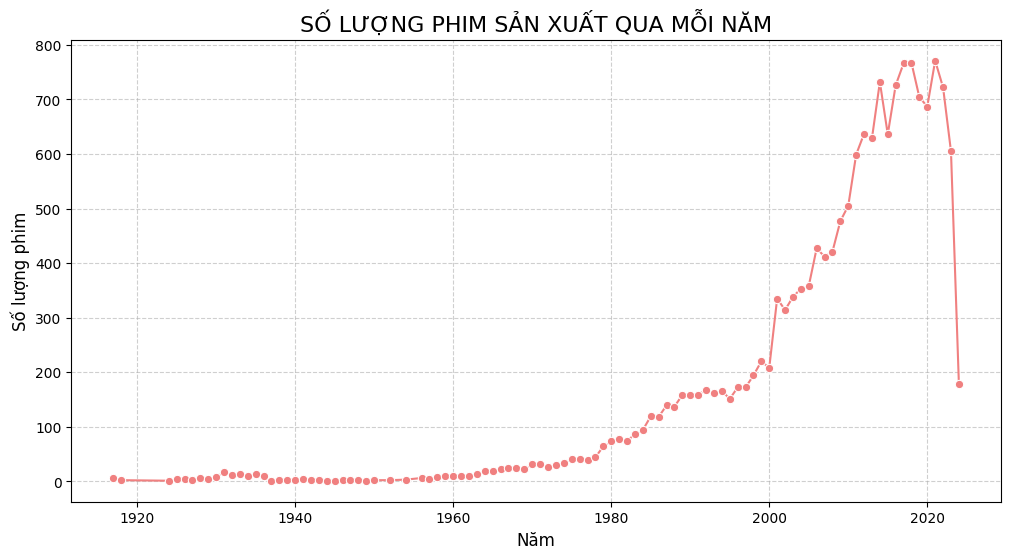

In [10]:
# Trực quan bằng biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='lightcoral')

# Điều chỉnh hiển thị biểu đồ 
plt.title("SỐ LƯỢNG PHIM SẢN XUẤT QUA MỖI NĂM", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng phim", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Giai đoạn 1920-1960 - phát triển chậm rãi**: ta thấy trong giai đoạn này, số lượng phim sản xuất mỗi năm rất thấp, dưới 20 phim trong một năm. Điều này phản ánh sự khởi đầu của hoạt hình Anime, nên có sự hạn chế về công nghệ, nguồn lực cũng như tài chính trong, do vậy số lượng phim được phát hành mỗi năm là rất ít.

**Giai đoạn 1960-1980 - tăng trưởng nhẹ**: từ năm 1960 trở đi ta thấy số lượng phim bắt đầu có xu hướng tăng đều tuy nhiên lượng tăng không quá nhiều. Điều này có thể lý giải là vì vào giai đoạn này đã có sự xuất hiện của những hãng phim lớn, công nghệ đã phát triển hơn so vố thời kỳ bắt đầu.

**Giai đoạn 1980-2000 - tăng trưởng nhanh**: ta thấy giai đoạn này số lượng phim bắt đầu tăng nhanh đáng kể. Thời kỳ này đã có sự ra đời của các thể loại mới, công nghệ sản xuất cũng đã cải tiến hơn và và Anime cũng dần được đón nhận rộng rãi trên toàn cầu. 

**Giai đoạn 2000-2020 - bùng nổ mạnh mẽ**: số lượng phim phát hành mỗi năm tăng nhanh chóng, có thời điểm đạt mức trên 500 phim/năm. Đây là giai đoạn mà Anime trở thành một trong những ngành công nghiệp giải trí hàng đầu tại Nhật Bản. Cùng với công nghệ kỹ thuật số và internet đã giúp việc sản xuất, phát hành, và quảng bá phim trở nên dễ dàng hơn. Anime đã trở thành một hiện tượng văn hóa toàn cầu, với sự tăng trưởng mạnh mẽ về cả sản xuất và tiêu thụ.

**Giai đoạn sau 2020 - giảm mạnh**: so với giai đoạn kề trước, từ năm 2020, số lượng phim giảm đáng kể. Điều này có thể do tác động của đại dịch COVID-19, khiến việc sản xuất và phát hành bị gián đoạn. Thêm vào đó, sự bão hòa của thị trường cũng có thể là một trong những lý do dẫn đến xu hướng này, các nhà sản xuất tập trung vào chất lượng phim nhiều hơn là số lượng.

**Kết luận:** *biểu đồ cho thấy sự phát triển vượt bậc của ngành công nghiệp anime từ giai đoạn khởi đầu đến thời kỳ đỉnh cao. Tuy nhiên, giai đoạn gần đây xuất hiện dấu hiệu suy giảm, có thể phản ánh những thách thức hiện tại trong việc sản xuất và cạnh tranh.*

Vì bộ dữ liệu có thời gian trải dài hơn 100 năm. Tuy nhiên ta nhận thấy từ **2010 - 2023 là giai đoạn có nhiều biến động của công nghiệp Anime** nên ta sẽ tập trung phân tích xu hướng các thể loại ở giai đoạn này.

In [11]:
# Lọc dữ liệu từ năm 2010 đến 2023
filtered_df = df_cleaned[(df_cleaned["Year"] >= 2010) & (df_cleaned["Year"] <= 2023)]
filtered_df.shape

(9486, 33)

In [12]:
# Tính tổng số phim mà mỗi thể loại tham gia trong giai đoạn này
genre_counts = filtered_df[genre_columns].sum().sort_values(ascending=False)
print(genre_counts)

UNKNOWN          5026
Action           2019
Comedy           1831
Fantasy          1697
Adventure        1038
Sci-Fi            877
Drama             772
Romance           757
Supernatural      621
Mystery           419
Ecchi             390
Slice of Life     378
Suspense          230
Horror            173
Sports            117
Hentai             97
Award Winning      85
Gourmet            82
Boys Love          74
Avant Garde        68
Girls Love         49
Erotica            30
dtype: int64


Ta thấy giá trị *UNKNOWN* được điền vào những phim không có thể loại cụ thể. Tuy nhiên lại chiếm số lượng khá lớn, không phù hợp với việc phân tích nên ta cũng tiến hành **xóa bỏ những hàng dữ liệu có thể loại là UNKNOWN**.

In [13]:
filtered_df = filtered_df[filtered_df['UNKNOWN'] != 1]
genre_columns.remove('UNKNOWN')

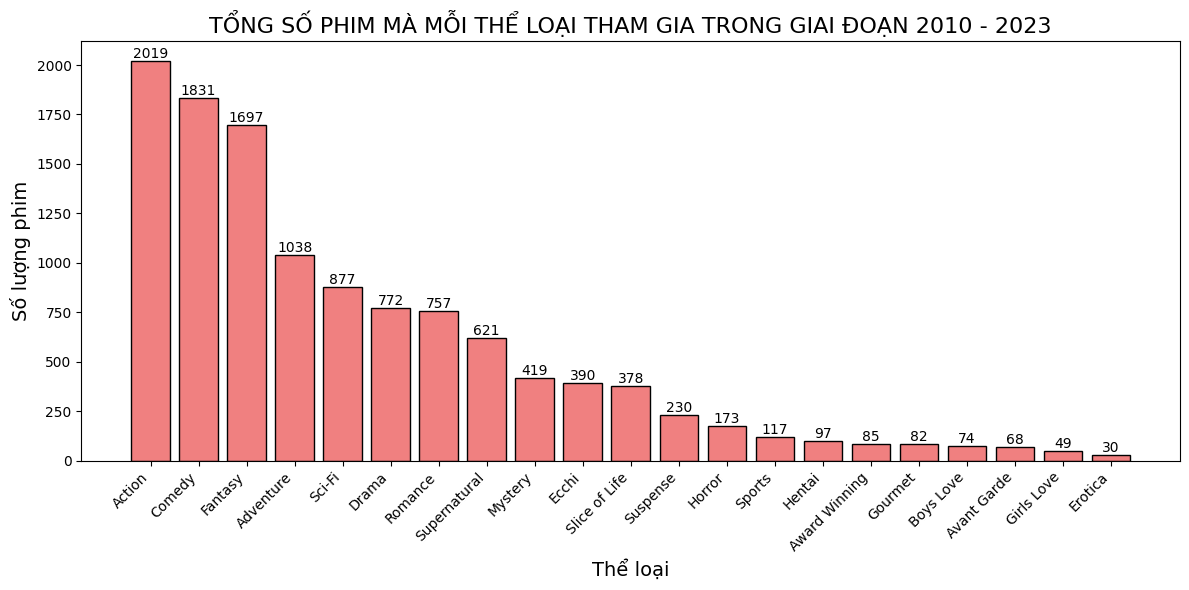

In [14]:
genre_counts = filtered_df[genre_columns].sum().sort_values(ascending=False) # Tính toán lại sau khi bỏ UNKNOWN
# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
bars = plt.bar(genre_counts.index, genre_counts.values, color='lightcoral', edgecolor='black')

# Thêm giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,    # Vị trí văn bản (x, y)
             f'{int(height)}',                          # Nội dung (giá trị số)
             ha='center', va='bottom', fontsize=10)     # Canh giữa và định dạng

# Thêm tiêu đề và nhãn
plt.title('TỔNG SỐ PHIM MÀ MỖI THỂ LOẠI THAM GIA TRONG GIAI ĐOẠN 2010 - 2023', fontsize=16)
plt.xlabel('Thể loại', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trên trục x để dễ đọc

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Các thể loại nổi bật:** Action là thể loại dẫn đầu với 2027 phim, thể hiện rằng thể loại này rất phổ biến, có thể nhận được nhiều sự ủng hộ của người xem nên được đầu tư sản xuất mạnh mẽ. Tiếp theo là Comedy và Fantasy với số lượng là 1835 và 1706 phim được ra mắt, cho thấy người xem cũng yêu thích những câu chuyện hài hước, kỳ ảo.

**Các thể loại có mức phổ biến khá:** bao gồm các thể loại với số lượng phim từ khoảng 500 trở lên như Adventure (1042 phim), Sci-Fi (879 phim), Drama (773 phim), Romance (758 phim) và Supernatural (621 phim).

**Các thể loại có mức phổ biến trung bình:** bao gồm những thể loại đặc thù, có tệp khán giả nhất định nên không quá phổ biến như Mystery (419 phim) và Ecchi (390 phim).

**Các thể loại ít phổ biến:** cũng bao gồm những bộ phim đặc thù, hoặc do các thể loại này kén người xem nên dù có sự hấp dẫn riêng thì vẫn không được đàu tư sản xuất nhiều như Horror (232 phim), Sports (173 phim), Hentai (118 phim), Award Winning (97 phim) và Gourmet (85 phim).

**Thể loại hiếm gặp:** với số lượng sản xuất ít, dưới 80 phim, do các thể loại này có thị trường nhỏ, chỉ tập trung vào các đối tượng riêng biệt, như Boys Love (74 phim), Avant Garde (68 phim), Girls Love (49 phim) và Erotica (30 phim).

**Kết luận:** 
- các hể loại hành động, hài hước và kỳ ảo chiếm ưu thế, với lượng phim vượt trội so với các thể loại khác.
- Các thể loại đặc thù như Boys Love, Avant Garde, và Erotica ít được sản xuất, phù hợp với một nhóm khán giả nhỏ.

*Biểu đồ này không chỉ cung cấp cái nhìn tổng quan về mức độ phổ biến của các thể loại Anime mà còn cho thấy sự ưu tiên đầu tư vào các thể loại được yêu thích rộng rãi. Các thể loại ít phổ biến hơn có thể mang tính thử nghiệm hoặc phục vụ đối tượng khán giả ngách.*

### b. Số lượng phim mà các thể loại "góp mặt" qua từng năm

In [15]:
# Tính số lượng cho mỗi thể loại
genre_counts_per_year = filtered_df.groupby('Year')[genre_columns].sum()
genre_counts_per_year = genre_counts_per_year.T
genre_counts_per_year

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Action,97,125,123,112,124,141,141,144,176,161,148,175,170,182
Award Winning,6,9,8,8,9,6,4,2,8,4,6,8,4,3
Sci-Fi,59,59,70,51,72,49,72,62,67,89,57,68,57,45
Adventure,49,55,59,51,61,53,61,71,84,86,88,91,110,119
Drama,38,48,60,46,45,40,51,59,82,66,54,87,45,51
Mystery,20,26,28,22,28,29,35,34,30,39,30,38,30,30
Supernatural,47,66,52,39,51,51,44,38,51,35,41,48,28,30
Fantasy,65,81,71,92,104,95,111,122,132,128,151,166,177,202
Comedy,123,138,152,138,167,150,136,122,127,128,119,99,111,121
Romance,42,53,71,58,64,54,54,58,67,49,47,42,44,54


**Các thể loại tăng trưởng ổn định:**
- Action là thể loại chiếm ưu thế, góp mặt với số lượng phim cao nhất qua từng năm. Giai đoạn 2018-2023, số lượng tăng mạnh, có thể do xu hướng yêu thích các bộ phim hành động kết hợp với các yếu tố khác như viễn tưởng hoặc phiêu lưu.
- Fantasy: gia tăng liên tục, từ 65 phim (2010) lên 203 phim (2023). Đât là thể loại tăng trưởng mạnh nhất.
- Comedy: góp mặt ổn định qua các năm, với số lượng cao (trên 120 phim mỗi năm) mặc dù có giai đoạn giảm nhẹ.

**Các thể loại tăng trưởng mạnh gần đây:**
- Adventure: tăng trưởng đều cho thấy sự ưa chuộng của khán giả đối với các cốt truyện phiêu lưu, thường kết hợp với hành động hoặc kỳ ảo.
- Romance: số lượng phim thuộc thể loại này duy trì ổn định ở mức 40-70 phim mỗi năm. Năm 2014-2018 là giai đoạn cao điểm, nhưng có dấu hiệu giảm từ 2020 trở đi.

**Các thể loại suy giảm và ít phổ biến:**
- Ecchi, Hentai: có số lượng suy giảm đáng kể. Có thể do thay đổi về thị hiếu khán giả hoặc quy định phát hành nội dung.
- Slice of Life: số lượng không ổn định, đạt đỉnh năm 2014 (39 phim), sau đó giảm mạnh đến 2023 (11 phim).
- Gourmet và Avant Garde: xuất hiện với số lượng rất thấp (dưới 10 phim mỗi năm). Mặc dù có sự tăng nhẹ vào các năm 2017-2019, nhưng vẫn không tạo được sự phổ biến rộng rãi.
- Boys Love và Girls Love: các thể loại này cũng có số lượng rất thấp, nhưng Boys Love có xu hướng ổn định hơn Girls Love.

**Các thể loại có biến động lớn:**
- Horror có biến động mạnh, với số lượng phim cao vào các năm 2012 và 2018 nhưng giảm dần sau đó.
- Supernatural giảm mạnh sau 2014, phản ánh sự thay đổi thị hiếu đối với các nội dung mang yếu tố thần bí.

**Kết luận:**
*các thể loại Action, Fantasy, Adventure, và Comedy vẫn dẫn đầu về mức độ phổ biến và sự tăng trưởng ổn định qua các năm. Một số thể loại như Ecchi, Hentai, và Slice of Life có xu hướng giảm, phản ánh sự thay đổi trong nhu cầu của khán giả.
Các thể loại khác vẫn giữ vai trò nhỏ, phục vụ các nhóm khán giả chuyên biệt.*

### c. Phân tích và trực quan đối với 5 thể loại phổ biến nhất

**PHÂN TÍCH SỐ LƯỢNG PHIM CỦA 5 THỂ LOẠI**

In [16]:
# Sắp xếp và lấy 5 thể loại phổ biến nhất
top_5_genres = genre_counts.sort_values(ascending=False).head(5)
print("Top 5 thể loại phổ biến (có số lượng phim phát hành lớn nhất) trong giai đoạn 2010 - 2023 là:")
print(top_5_genres)

Top 5 thể loại phổ biến (có số lượng phim phát hành lớn nhất) trong giai đoạn 2010 - 2023 là:
Action       2019
Comedy       1831
Fantasy      1697
Adventure    1038
Sci-Fi        877
dtype: int64


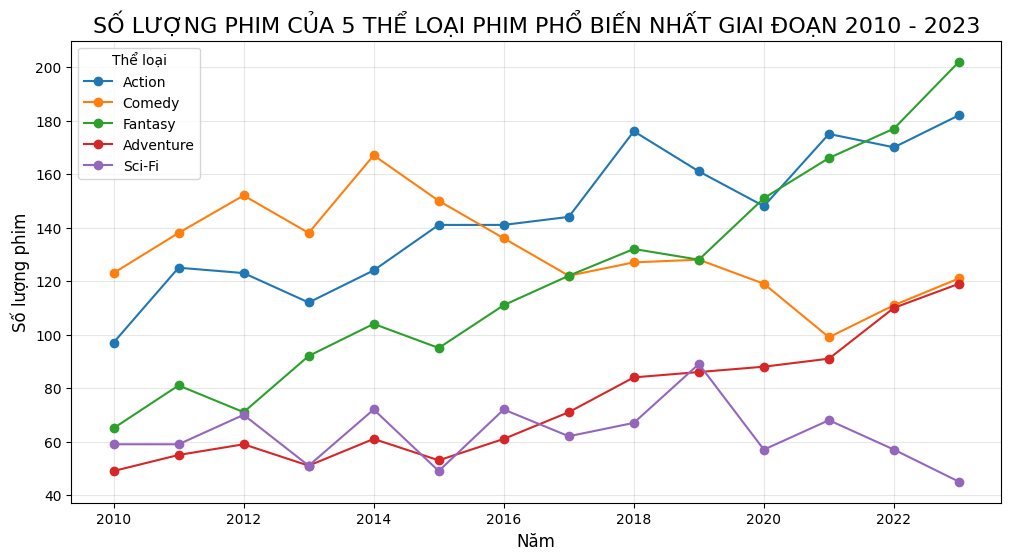

In [17]:
total_genres = genre_counts_per_year.sum(axis=1)

# Lấy 5 thể loại có nhiều phim nhất
top_5_genres = total_genres.nlargest(5).index

# Lấy dữ liệu của 5 thể loại nổi bật nhất
top_5_data = genre_counts_per_year.loc[top_5_genres]

# Vẽ biểu đồ xu hướng
plt.figure(figsize=(12, 6))

for genre in top_5_data.index:
    plt.plot(top_5_data.columns, top_5_data.loc[genre], marker='o', label=genre)
    

# Tùy chỉnh biểu đồ
plt.title("SỐ LƯỢNG PHIM CỦA 5 THỂ LOẠI PHIM PHỔ BIẾN NHẤT GIAI ĐOẠN 2010 - 2023", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng phim", fontsize=12)
plt.legend(title="Thể loại")
plt.grid(alpha=0.3)
plt.show()

**Phân tích chi tiết từng thể loại:**
- Action: tăng trưởng tổng thể với một số biến động. Từ năm 2010 (97 phim) đến 2023 (183 phim), số lượng phim hành động tăng gần gấp đôi. Có sự dao động nhẹ trong một số năm, ví dụ như giảm vào năm 2013 (112 phim) sau đó tăng dần trở lại. Giai đoạn 2017–2023 có sự tăng trưởng ổn định và mạnh mẽ.
- Adventure :tăng trưởng đáng kể, đặc biệt từ năm 2016 trở đi. Vào năm 2010 có 49 phim, đến năm 2023 đạt 121 phim, tăng hơn 2 lần. Từ 2017, số lượng phim phiêu lưu tăng đều đặn mỗi năm, cho thấy sự phổ biến ngày càng cao.
- Comedy: tăng trưởng nhẹ và có xu hướng chững lại. Năm 2010 có 123 phim, đạt đỉnh điểm 167 phim (2014), nhưng giảm dần sau đó. Đặc biệt, giai đoạn 2020–2021, số lượng phim hài giảm đáng kể, nhưng từ 2022–2023, thể loại này đã hồi phục.
- Fantasy (Giả tưởng): tuy không phải là thể loại phát hành nhiều phim nhất nhưng lại tăng trưởng mạnh mẽ và ổn định nhất. Cụ thể từ 65 phim (2010) lên 203 phim (2023), tăng hơn 3 lần, là thể loại có sự phát triển rõ rệt nhất, với mức tăng đều qua các năm.
- Sci-Fi: thể loại này biến động không ổn định, không tăng trưởng dài hạn. Số lượng phim dao động qua các năm, từ 59 phim (2010) lên 89 phim (2019), nhưng sau đó giảm xuống chỉ còn 46 phim (2023). Đây là thể loại có xu hướng giảm dần kể từ 2019.

**Kết luận:** *tất cả các thể loại phim đều cho thấy xu hướng tăng trưởng về số lượng phim sản xuất trong giai đoạn này. Điều này cho thấy sự phát triển mạnh mẽ Anime và nhu cầu giải trí của khán giả ngày càng đa dạng. Các thể loại phim liên tục cạnh tranh nhau để thu hút khán giả. Điều này dẫn đến sự thay đổi về vị trí của các thể loại trong bảng xếp hạng số lượng phim sản xuất qua các năm. Một số thể loại phim có những giai đoạn tăng trưởng đột biến hoặc giảm mạnh, cho thấy sự ảnh hưởng của các yếu tố thị trường, xu hướng văn hóa xã hội và sự thành công của các bộ phim thuộc thể loại đó.*

**PHÂN TÍCH ĐIỂM TRUNG BÌNH CỦA CÁC THỂ LOẠI**

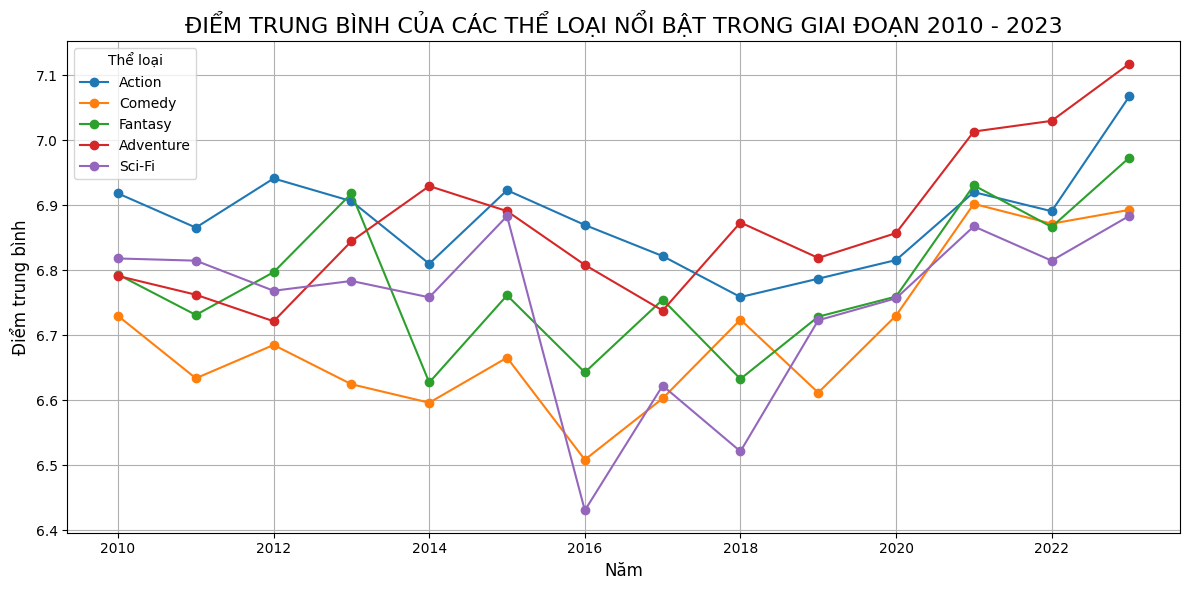

In [18]:
avg_score = {}
for genre in top_5_genres: 
    genre_data = filtered_df[filtered_df[genre] == 1]  # Lọc các phim thuộc thể loại đó
    avg = genre_data.groupby('Year')['Score'].mean()  # Tính trung bình theo năm
    avg_score[genre] = avg

plt.figure(figsize=(12, 6))
for genre, yearly_avg in avg_score.items():
    plt.plot(yearly_avg.index, yearly_avg.values, marker="o", label=genre)

# Tùy chỉnh biểu đồ
plt.title("ĐIỂM TRUNG BÌNH CỦA CÁC THỂ LOẠI NỔI BẬT TRONG GIAI ĐOẠN 2010 - 2023", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Điểm trung bình", fontsize=12)
plt.legend(title="Thể loại", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

**Phân tích chi tiết từng thể loại:**
- Action: có điểm trung bình tương đối ổn định, với sự cải thiện nhẹ vào cuối giai đoạn. Cụ thể giai đoạn từ 2010 đến 2020, điểm trung bình dao động nhẹ quanh mức 6.8–6.9. Nhưng giai đoạn 2021 đến 2023, điểm số bắt đầu tăng dần, đạt hơn 7 vào năm 2023, thể hiện sự cải thiện về chất lượng. Ta thấy mặc dù số lượng phim tăng đáng kể nhưng chất lượng vẫn được duy trì ổn định, thậm chí cải thiện ở những năm gần đây.
- Comedy: có điểm trung bình ổn định trong phần lớn thời gian nhưng có sự cải thiện đáng kể từ năm 2020. Cụ thể giai đoạn 2010–2019, điểm trung bình dao động quanh mức 6.6–6.7. Nhưng từ năm 2020, điểm trung bình bắt đầu tăng lên, đạt 6.9 vào năm 2023. Ta thấy rằng sau một giai đoạn ổn định, chất lượng phim hài đã được cải thiện, đặc biệt là trong những năm gần đây.
- Fantasy: là thể loại có chất lượng phim tăng trưởng ổn định, đặc biệt rõ rệt trong những năm cuối. Cụ thể vào giai đoạn 2010–2020, điểm trung bình dao động nhẹ quanh mức 6.7–6.9. Nhưng từ năm 2021 trở đi, điểm số tăng lên đáng kể, đạt gần 7 điểm vào năm 2023. Ta thấy thể loại này vừa tăng trưởng về số lượng, vừa cải thiện chất lượng, chứng tỏ sự đầu tư mạnh mẽ vào thể loại này.
- Adventure: có điểm trung bình tăng đều đặn, cho thấy sự phát triển ổn định về chất lượng. Cụ thể vào giai đoạn 2010–2015, điểm trung bình dao động quanh mức 6.7–6.9. Nhưng từ năm 2016 đến 2023, điểm trung bình tăng liên tục, đạt đỉnh hơn 7 vào năm 2023. Điều này cho thể các pim phiêu lưu đang ngày càng chất lượng hơn, phản ánh sự phổ biến và đầu tư cho thể loại này.
- Sci-Fi: là thể loại có điểm trung bình không ổn định, có xu hướng phục hồi trong những năm gần đây. Cụ thể vào giai đoạn 2010–2016, điểm trung bình có sự giảm nhẹ, từ 6.8 xuống 6.4 (2016). Nhưng từ năm 2017 trở đi, điểm số tăng trở lại và đạt 6.8 vào năm 2023. Ta thấy dù số lượng phim giảm, chất lượng phim khoa học viễn tưởng đang dần phục hồi, nhưng chưa đạt mức nổi bật so với các thể loại khác.

**Kết luận:** *các thể loại đều có sự tăng trưởng và cải thiện ở mức ổn định, hoặc được phục hồi về chất lượng. Đặc biệt các thể loại như Fantasy và Adventure không chỉ tăng trưởng về số lượng mà còn có sự cải thiện rõ rệt về chất lượng.*


**PHÂN TÍCH ĐỘ PHỔ BIẾN CỦA CÁC THỂ LOẠI**

Thông qua tìm hiểu, mức độ phổ biến của một phim được đánh giá dựa trên *số lượng người dùng thêm phim này vào watchlist của họ*.

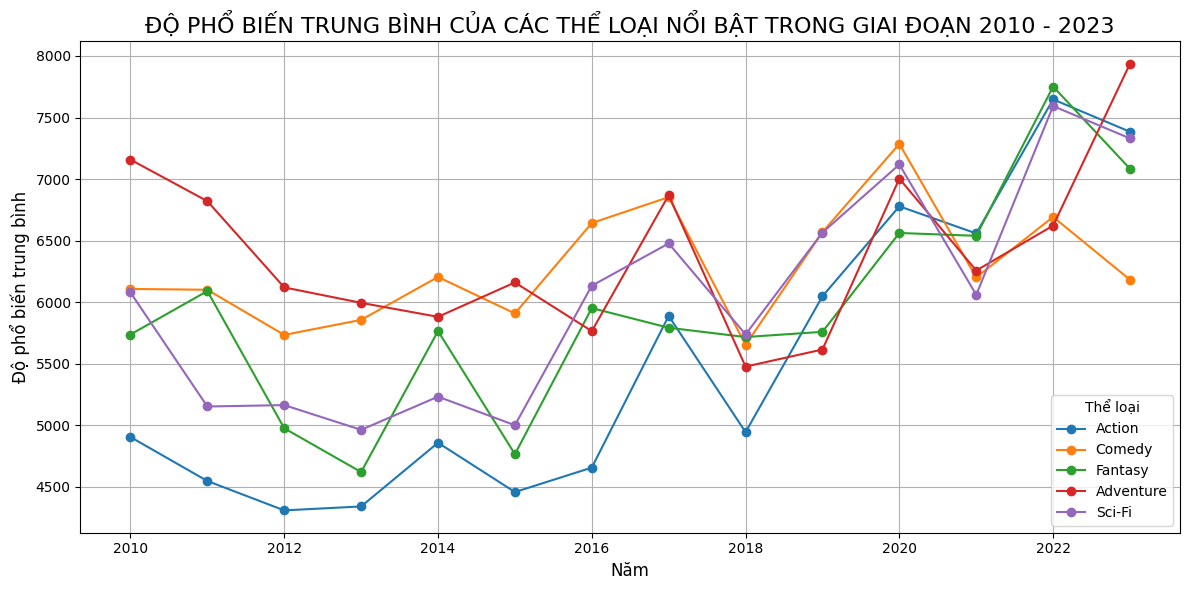

In [19]:
avg_popularity = {}

for genre in top_5_genres:
    genre_data = filtered_df[filtered_df[genre] == 1]
    avg = genre_data.groupby('Year')['Popularity'].mean()
    avg_popularity[genre] = avg
    

plt.figure(figsize=(12, 6))
for genre, yearly_avg_popularity in avg_popularity.items():
    plt.plot(yearly_avg_popularity.index, yearly_avg_popularity.values, marker="o", label=genre)

# Tùy chỉnh biểu đồ
plt.title("ĐỘ PHỔ BIẾN TRUNG BÌNH CỦA CÁC THỂ LOẠI NỔI BẬT TRONG GIAI ĐOẠN 2010 - 2023", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Độ phổ biến trung bình", fontsize=12)
plt.legend(title="Thể loại", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

**Phân tích chi tiết từng thể loại:**
- Action: độ phổ biến có xu hướng tăng dần từ năm 2010 đến 2023, tuy nhiên có một vài dao động nhẹ trong giai đoạn 2014-2018. Cụ thể, có sự giảm nhẹ vaog giai đoạn 2010 đến 2013 nhưng vào giai đoạn 2017 đến 2023, độ phổ biến tăng đáng kể, tăng mạnh vào 2019 đến 2022, thể loại này đạt đỉnh vào năm 2022 với số lượng 7600 người dùng thêm vào watchlist của họ. Điều này cho thấy thể loại hành động ngày càng thu hút sự quan tâm của khán giả, đặc biệt trong những năm gần đây.
- Comedy: có xu hướng dao động nhẹ và không có sự tăng trưởng rõ rệt như Action, đạt độ phổ biến cao nhất vào năm 2020 với con số khoảng 7200, nhưng sau đó có xu hướng giảm dần trong năm 2021 và 2023. Sự dao động này có thể do thị hiếu của khán giả thay đổi hoặc ảnh hưởng từ các yếu tố khác như nội dung hoặc chất lượng sản phẩm.
- Fantasy: có xu hướng tăng ổn định từ năm 2010 đến 2023, với một số năm giảm nhẹ. Đặc biệt, độ phổ biến tăng mạnh trong giai đoạn 2020-2022, đạt đỉnh vào năm 2022 với khoảng 7700 người dùng thêm vào watchlist. Cho thấy sự bùng nổ của thể loại này trong giai đoạn gần đây.
- Adventure: độ phổ biến cũng có xu hướng tăng trưởng đáng kể từ năm 2010 đến 2023, mặc dù dao động ở một vài giai đoạn. Cụ thể,  giảm nhẹ vào năm 2018 và 2019 cho thấy sự cạnh tranh hoặc ảnh hưởng từ các thể loại khác. Độ phổ biến đạt giá trị cao nhất vào năm 2023 với gần 8000 người thêm vào watchlist, thể hiện sự quan tâm mạnh mẽ từ khán giả đối với thể loại phiêu lưu.
- Sci-Fi: độ phổ biến có xu hướng tăng ổn định, nhưng thấp hơn một chút so với Fantasy và Adventure. Sci-Fi đạt đỉnh vào năm 2022 với khoảng 7600 người thêm vào watchlist, tương đương với Action, nhưng có xu hướng giảm nhẹ vào năm 2023. Điều này cho thấy thể loại này vẫn giữ được sức hút, nhưng có sự cạnh tranh mạnh mẽ từ các thể loại khác như Action và Fantasy.

**Kết luận:** *các thể loại đều có xu hướng giảm nhẹ độ phổ biến trong giai đoạn 2010 - 2015, vì đây là giai đoạn mà thị trường phim đang điều chỉnh với sự cạnh tranh gia tăng với các thể loại giải trí khác. Nhưng sau đó, từ 2016 trở đi thì các thể loại đều tăng dần về độ phổ biến qua các năm, điều này là vì sự phát triển của các nền tảng phát trực tuyến, sự tăng cường đầu tư vào các thể loại này cũng như nhu cầu đa dạng của khán giả. Dữ liệu cho thấy sự tương đồng về độ phổ biến trung bình giữa các thể loại trong cùng một năm, hông có thể loại nào có mức độ phổ biến nổi bật so với các thể loại khác, cho thấy sự cân bằng trong thị hiếu khán giả đối với các loại phim này.*

### d. Kết luận về xu hướng của các thể loại phim:

- Mỗi giai đoạn phản ánh một bước tiến trong sự phát triển của ngành công nghiệp anime, từ khởi đầu khiêm tốn đến thời kỳ đỉnh cao, và cả những thách thức gần đây.
- Xu hướng phát triển chung là sự tăng trưởng cả về số lượng và chất lượng, với những thay đổi phù hợp với thị hiếu khán giả và sự phát triển của nền công nghiệp hoạt hình Nhật Bản.
- Xu hướng chung của các thể loại Anime từ 2010 đến 2023 cho thấy **sự tăng trưởng mạnh mẽ** về số lượng và chất lượng sản phẩm, vì đây là giai đoạn mà Anime trở nên phổ biến hơn trên toàn cầu. Xu hướng thể hiện rõ rệt ở các thể loại **Action, Fantasy, Adventure, và Comedy**. Các thể loại này tiếp tục thu hút sự quan tâm lớn từ khán giả và được đầu tư mạnh mẽ.
- Tuy nhiên, một số thể loại khác như **Sci-Fi, Supernatural, Romance** có dấu hiệu chững lại hoặc giảm nhẹ, phản ánh sự thay đổi trong nhu cầu và thị hiếu khán giả. Các thể loại ngách và ít phổ biến vẫn giữ vai trò nhất định trong việc đa dạng hóa thị trường Anime, dù có số lượng sản xuất khiêm tốn.
- Nhưng cũng vì số lượng tăng nhanh trong một thời gian ngắn nên dẫn đến thị trường bị bão hòa, vì vậy số lượng phim ra mắt có phần giảm sút ở giai đoạn 2018 - 2019.
- Nhìn chung, sự phát triển của Anime trong giai đoạn này phản ánh rõ nhu cầu **giải trí đa dạng**, điều này cho thấy Anime ngày càng được tiếp cận rộng rãi hơn và nhu cầu của người xem cũng cao hơn. Ngoài ra còn giúp ta thấy rõ sự cạnh tranh giữa các thể loại và nỗ lực nâng cao chất lượng để đáp ứng thị trường ngày càng khắt khe.